### Import Library

In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Import Data

In [2]:
tuning = pd.read_csv('hasiltuning/hasiltuning.csv')
tuning

,hidden_layer,hidden_neuron,aktivasi,lr,epoch,mse,bobot,bias,bobot_output,bias_output,mse_list
0,1,"(2,)",relu,0.0001,100,0.004647,"[[[np.float64(-0.3098401122445924), np.float64...","[[0.41770561461960476, np.float64(-0.316034350...","[np.float64(0.499480544276838), np.float64(0.3...",0.374371,"[np.float64(1.8252634267898935), np.float64(0...."
1,1,"(2,)",relu,0.0001,200,0.047708,"[[[np.float64(-0.19697657345155606), np.float6...","[[0.5023398935575754, np.float64(-1.0441840095...","[np.float64(0.9193960696103054), np.float64(0....",0.895480,"[np.float64(13.363339896541497), np.float64(0...."
2,1,"(2,)",relu,0.0010,100,0.052485,"[[[np.float64(-4.903490529354346), np.float64(...","[[0.8103496089334337, np.float64(-2.2415614744...","[np.float64(0.9698847300113459), np.float64(0....",0.500738,"[np.float64(4.332502372973904), np.float64(0.0..."
3,1,"(2,)",relu,0.0010,200,0.011031,"[[[np.float64(-3.8779108364510573), np.float64...","[[0.7242650343950839, np.float64(-4.1583997482...","[np.float64(0.6642022747999236), np.float64(0....",0.685237,"[np.float64(5.056697186851262), np.float64(0.0..."
4,1,"(2,)",sigmoid,0.0001,100,0.048263,"[[[np.float64(0.7942046012699949), np.float64(...","[[0.1960893340554638, np.float64(0.34149975022...","[np.float64(0.7951085048289629), np.float64(0....",0.976747,"[np.float64(0.053993781789340944), np.float64(..."
...,...,...,...,...,...,...,...,...,...,...,...
139,2,"(4, 4)",sigmoid,0.0010,200,0.012857,"[[[np.float64(0.4855992620101374), np.float64(...","[[0.39519769789969206, 0.41853726930294965, 0....","[np.float64(0.8505423079860022), np.float64(0....",0.966330,"[np.float64(0.08598366886800504), np.float64(0..."
140,2,"(4, 4)",tanh,0.0001,100,0.011989,"[[[np.float64(0.010673842938404756), np.float6...","[[0.42529227099950573, 0.6416521508416995, 0.6...","[np.float64(0.2880624885515357), np.float64(0....",0.316304,"[np.float64(0.046368886816909635), np.float64(..."
141,2,"(4, 4)",tanh,0.0001,200,0.013339,"[[[np.float64(0.5888326895607654), np.float64(...","[[0.7294991021282342, 0.49169219902660577, 0.2...","[np.float64(0.15477019627244215), np.float64(0...",0.589441,"[np.float64(0.05082817639649249), np.float64(0..."
142,2,"(4, 4)",tanh,0.0010,100,0.020749,"[[[np.float64(-0.40980347286448965), np.float6...","[[0.2605852643702664, 0.764458649135174, 0.348...","[np.float64(0.1500491741730867), np.float64(0....",0.308765,"[np.float64(0.0892185496610021), np.float64(0...."


In [ ]:
X_test = pd.read_csv('dataset/X_test.csv').values
X_test

array([[0.90909091, 0.72924046, 0.78047824, 0.77438659, 0.37263913],
       [0.81818182, 0.66017316, 0.5876127 , 0.6888091 , 0.28629199],
       [0.6969697 , 0.50314837, 0.29086633, 0.48473968, 0.06663297],
       ...,
       [0.90909091, 0.75816608, 0.77224618, 0.77558348, 0.45094435],
       [0.63636364, 0.5733963 , 0.4880439 , 0.76181927, 0.37314462],
       [0.3030303 , 0.64285714, 0.46961976, 0.71813285, 0.29001425]])

In [ ]:
y_test = pd.read_csv('dataset/y_test.csv').values
y_test

array([[0.8115351 ],
       [0.70841829],
       [0.42805127],
       [0.54631518],
       [0.67040489],
       [0.83236237],
       [0.69967958],
       [0.63180891],
       [0.68948442],
       [0.6307894 ],
       [0.90940868],
       [0.55257792],
       [0.52665307],
       [0.77468686],
       [0.68933877],
       [0.5576755 ],
       [0.64797553],
       [0.48762016],
       [0.87110399],
       [0.76696767],
       [0.68700845],
       [0.70128168],
       [0.69851442],
       [0.73026507],
       [0.64156714],
       [0.73565395],
       [0.65452957],
       [0.6427323 ],
       [0.72473056],
       [0.56918147],
       [0.60602971],
       [0.76565686],
       [0.61141858],
       [0.79230993],
       [0.81794349],
       [0.93955724],
       [0.66239441],
       [0.65117973],
       [0.69866006],
       [0.68642587],
       [0.61112729],
       [0.72429362],
       [0.58068745],
       [0.80847655],
       [0.77119138],
       [0.6974949 ],
       [0.62875036],
       [0.800

##### Fungsi aktivasi

In [5]:
def aktivasiX(activ, x): 
    # aktivasi relu
    if activ == 'relu':
        if x >= 0:
            return x
        else:
            return 0
    # aktivasi sigmoid
    elif activ == 'sigmoid':
        return 1 / (1 + math.exp(-x))
    # aktivasi softmax
    elif activ == 'softmax':
        return 1
    # aktivasi tanh
    else:
        return (math.exp(x) - math.exp(-x)) / (math.exp(x) + math.exp(-x))

def turunanaktivasiX(activ, x): 
    # turunan aktivasi relu
    if activ == 'relu':
        if x > 0:
            return 1
        else:
            return 0
    # turunan aktivasi sigmoid
    elif activ == 'sigmoid':
        sig = 1 / (1 + math.exp(-x))
        return sig * (1 - sig)
    # turunan aktivasi softmax
    elif activ == 'softmax':
        return 0
    # turunan aktivasi tanh
    else:
        tan = (math.exp(x) - math.exp(-x)) / (math.exp(x) + math.exp(-x))
        return 1 - (tan) ** 2

##### Best parameter

In [6]:
best_index = tuning['mse'].idxmin()
best_hidden_layer_global = tuning['hidden_layer'][best_index]
best_hidden_neuron_global = tuning['hidden_neuron'][best_index]
best_aktivasi_global = tuning['aktivasi'][best_index]
best_lr_global = tuning['lr'][best_index]
best_epoch_global = tuning['epoch'][best_index]
best_mse_global = tuning['mse'][best_index]
best_bobot_global = tuning['bobot'][best_index]
best_bias_global = tuning['bias'][best_index]
best_bobot_output_global = tuning['bobot_output'][best_index]
best_bias_output_global = tuning['bias_output'][best_index]

print("Best Index:", best_index)
print("Best Hidden Layer:", best_hidden_layer_global)
print("Best Hidden Neuron:", best_hidden_neuron_global)
print("Best Aktivasi:", best_aktivasi_global)
print("Best Learning Rate:", best_lr_global)
print("Best Epoch:", best_epoch_global)
print("Best MSE:", best_mse_global)
print("Best Bobot:", best_bobot_global)
print("Best Bias:", best_bias_global)
print("Best Bobot Output:", best_bobot_output_global)
print("Best Bias Output:", best_bias_output_global)

Best Index: 0
Best Hidden Layer: 1
Best Hidden Neuron: (2,)
Best Aktivasi: relu
Best Learning Rate: 0.0001
Best Epoch: 100
Best MSE: 0.0046473069295618
Best Bobot: [[[np.float64(-0.3098401122445924), np.float64(0.3814742009731637)], [np.float64(-0.05237008023047972), np.float64(0.2080316722180022)], [np.float64(0.28318618535255174), np.float64(0.4682242021891708)], [np.float64(0.028475214765678884), np.float64(0.29743736301177187)]]]
Best Bias: [[0.41770561461960476, np.float64(-0.3160343507099042)]]
Best Bobot Output: [np.float64(0.499480544276838), np.float64(0.32014824725020186)]
Best Bias Output: 0.3743712918686607


##### Mengembalikan menjadi list

In [7]:
best_bobot_global = eval(best_bobot_global)
best_bias_global = eval(best_bias_global)
best_bobot_output_global = eval(best_bobot_output_global)

### Prediksi X_test

##### Fungsi prediksi X_test

In [8]:
def predict(X_test, y_test, bobot, bias, bobot_output, bias_output, aktivasi):
    prediksi = []
    error = []
    aktual = []
    for i in range(len(X_test)):
        # FEEDFORWARD
        # Operasi pada Hidden Layer
        aktivasi_hidden = []
        for j in range(len(bobot)):  # untuk setiap hidden layer
            aktivasi_hidden_temp = []
            for k in range(len(bobot[j][0])):  # jumlah neuron di hidden layer
                sumXbobot = 0
                if j == 0:  # layer pertama
                    for l in range(4):  # jumlah neuron input
                        sumXbobot += bobot[j][l][k] * X_test[i][l]
                else:
                    for l in range(len(aktivasi_hidden[j - 1])):
                        sumXbobot += bobot[j][l][k] * aktivasi_hidden[j - 1][l]
                sumXbobotbias = bias[j][k] + sumXbobot
                aktivasi_hidden_temp.append(aktivasiX(aktivasi, sumXbobotbias))
            aktivasi_hidden.append(aktivasi_hidden_temp)

        # Operasi pada Output Layer
        sumZbobotoutput = 0
        for j in range(len(aktivasi_hidden[-1])):
            sumZbobotoutput += bobot_output[j] * aktivasi_hidden[-1][j]
        sumZbobotoutput_biasoutput = bias_output + sumZbobotoutput
        predik = aktivasiX(aktivasi, sumZbobotoutput_biasoutput)
        prediksi.append(predik)
        error.append(abs(y_test[i][0] - predik))

    return prediksi, error

##### Pemanggilan fungsi prediksi

In [9]:
prediksi, error = predict(X_test, y_test, best_bobot_global, best_bias_global, best_bobot_output_global, best_bias_output_global, best_aktivasi_global)

##### Visualisasi hasil prediksi dan aktual

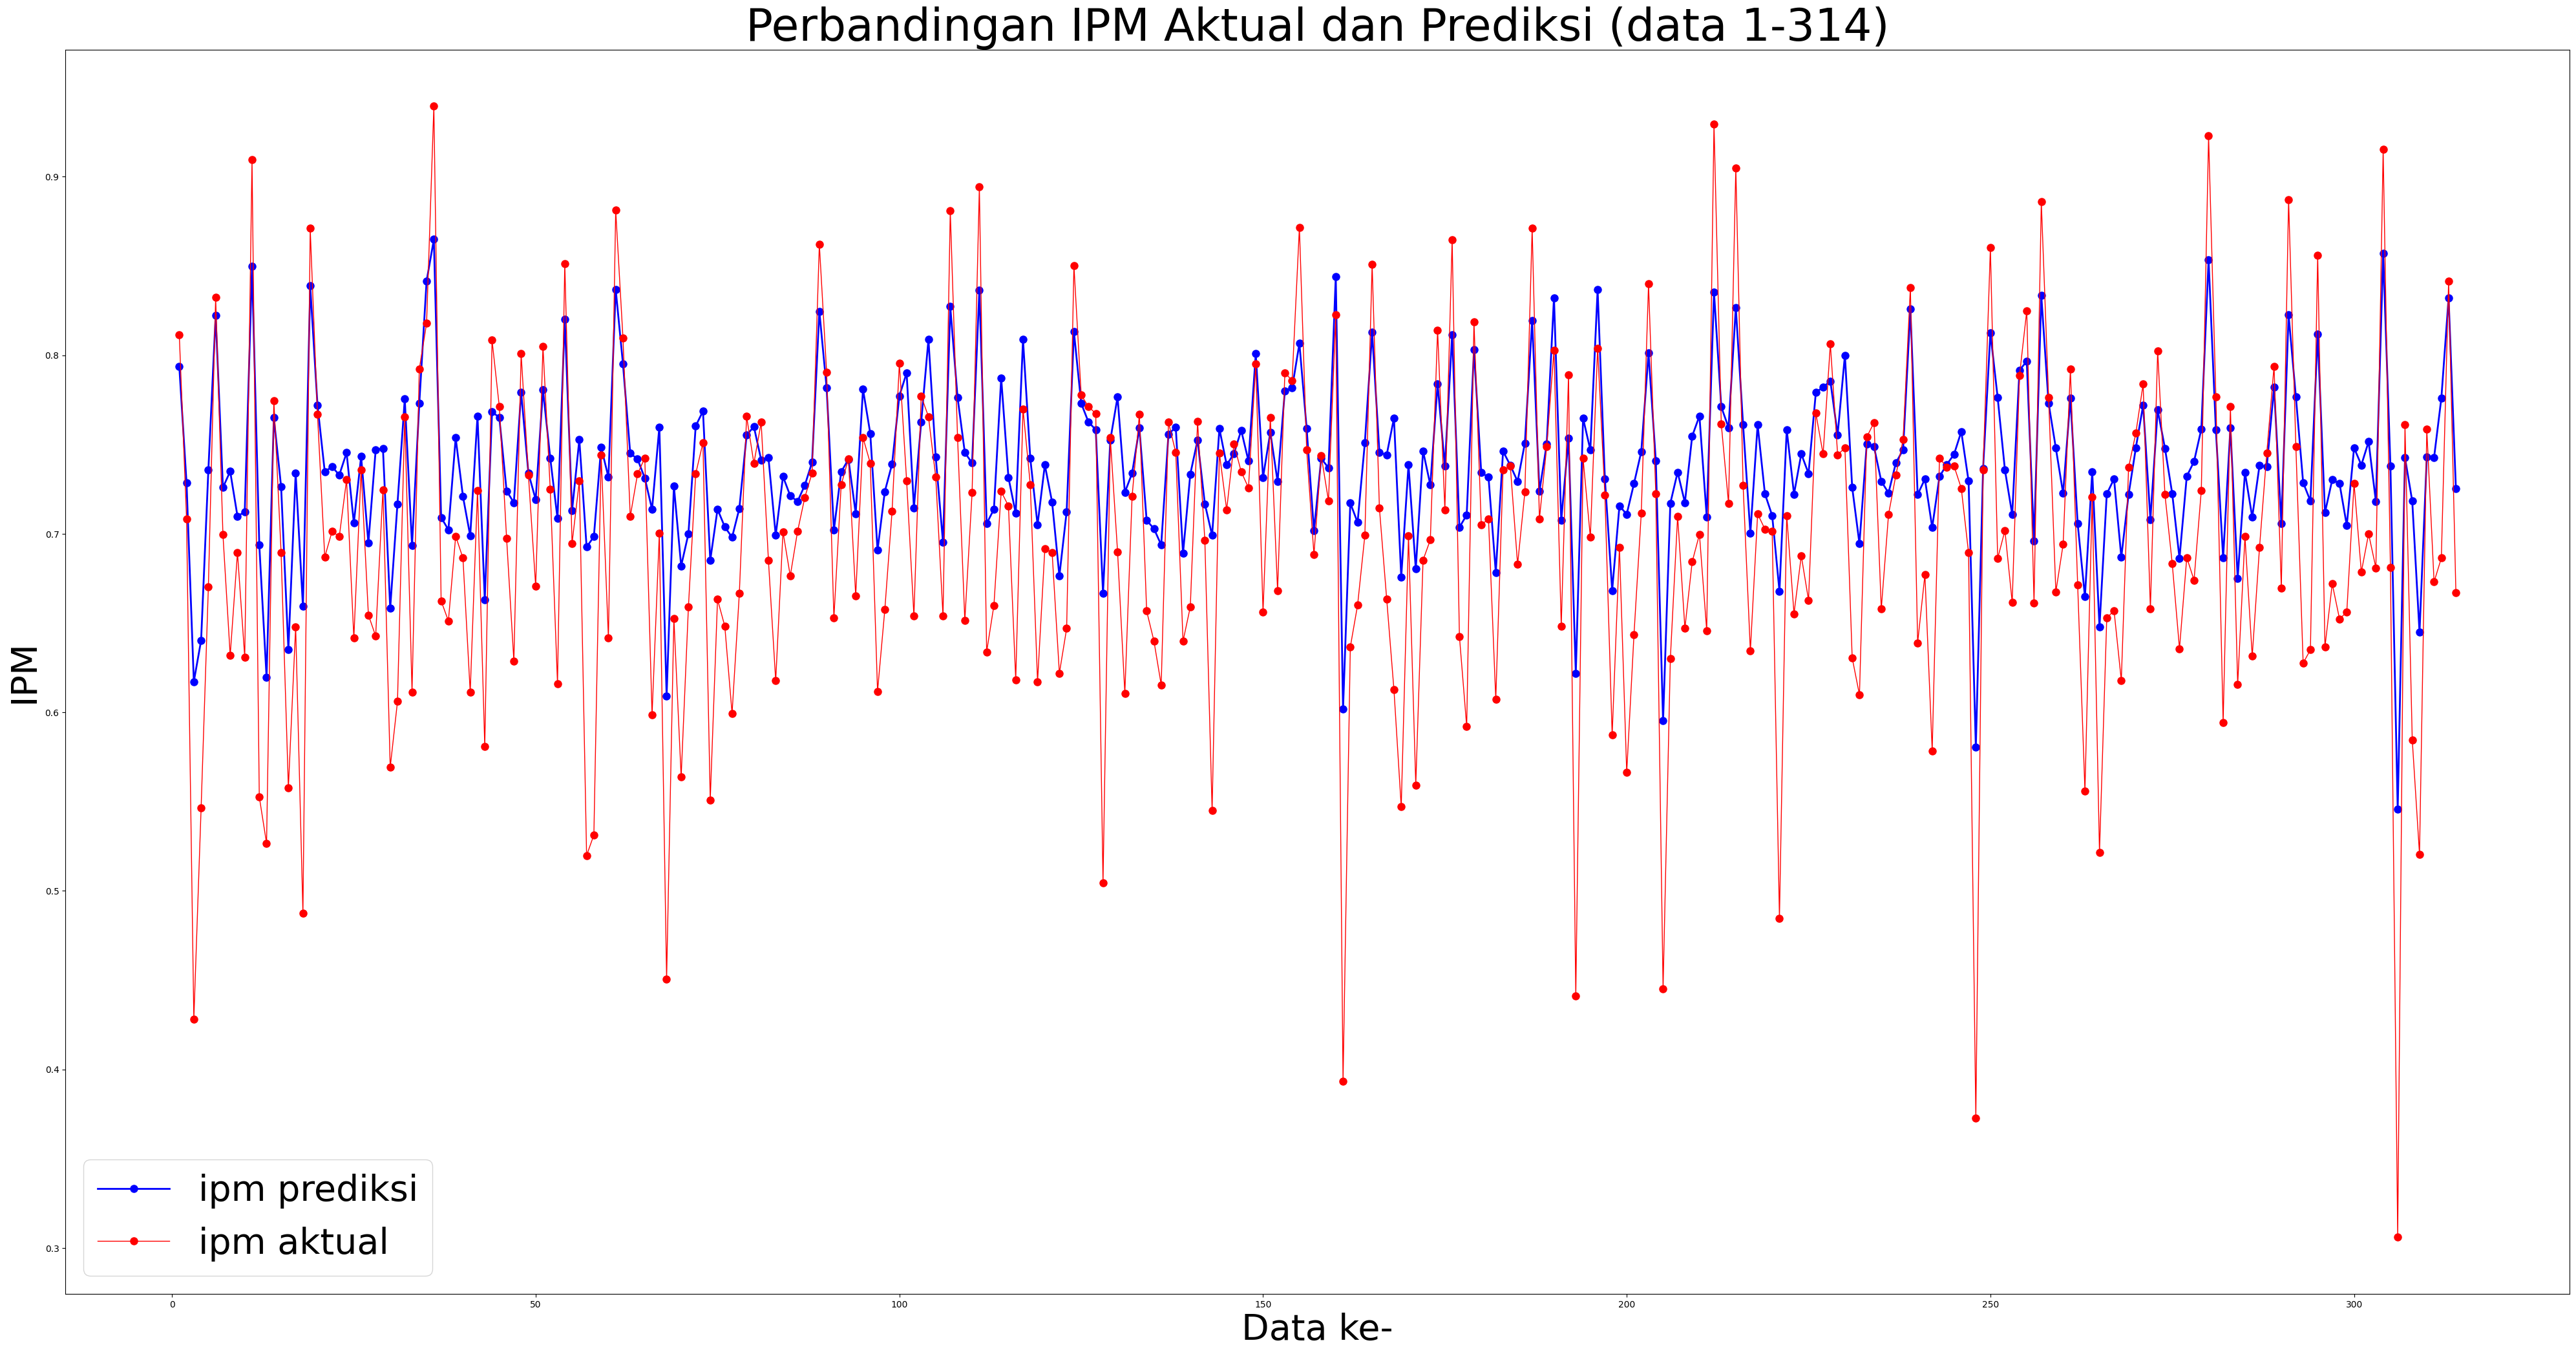

In [10]:
datake = list(range(1, int(len(y_test)/2) + 1))
plt.figure(figsize=(50, 25))
plt.plot(datake, prediksi[:314], label="ipm prediksi", color='blue', linewidth=2, marker='o', markersize=8)
plt.plot(datake, y_test[:314], label="ipm aktual", color='red', linewidth=1, marker='o', markersize=8)
plt.title('Perbandingan IPM Aktual dan Prediksi (data 1-314)', fontsize=50)
plt.xlabel('Data ke-', fontsize=40)
plt.ylabel('IPM', fontsize=40)
plt.legend(fontsize=40)
plt.show()

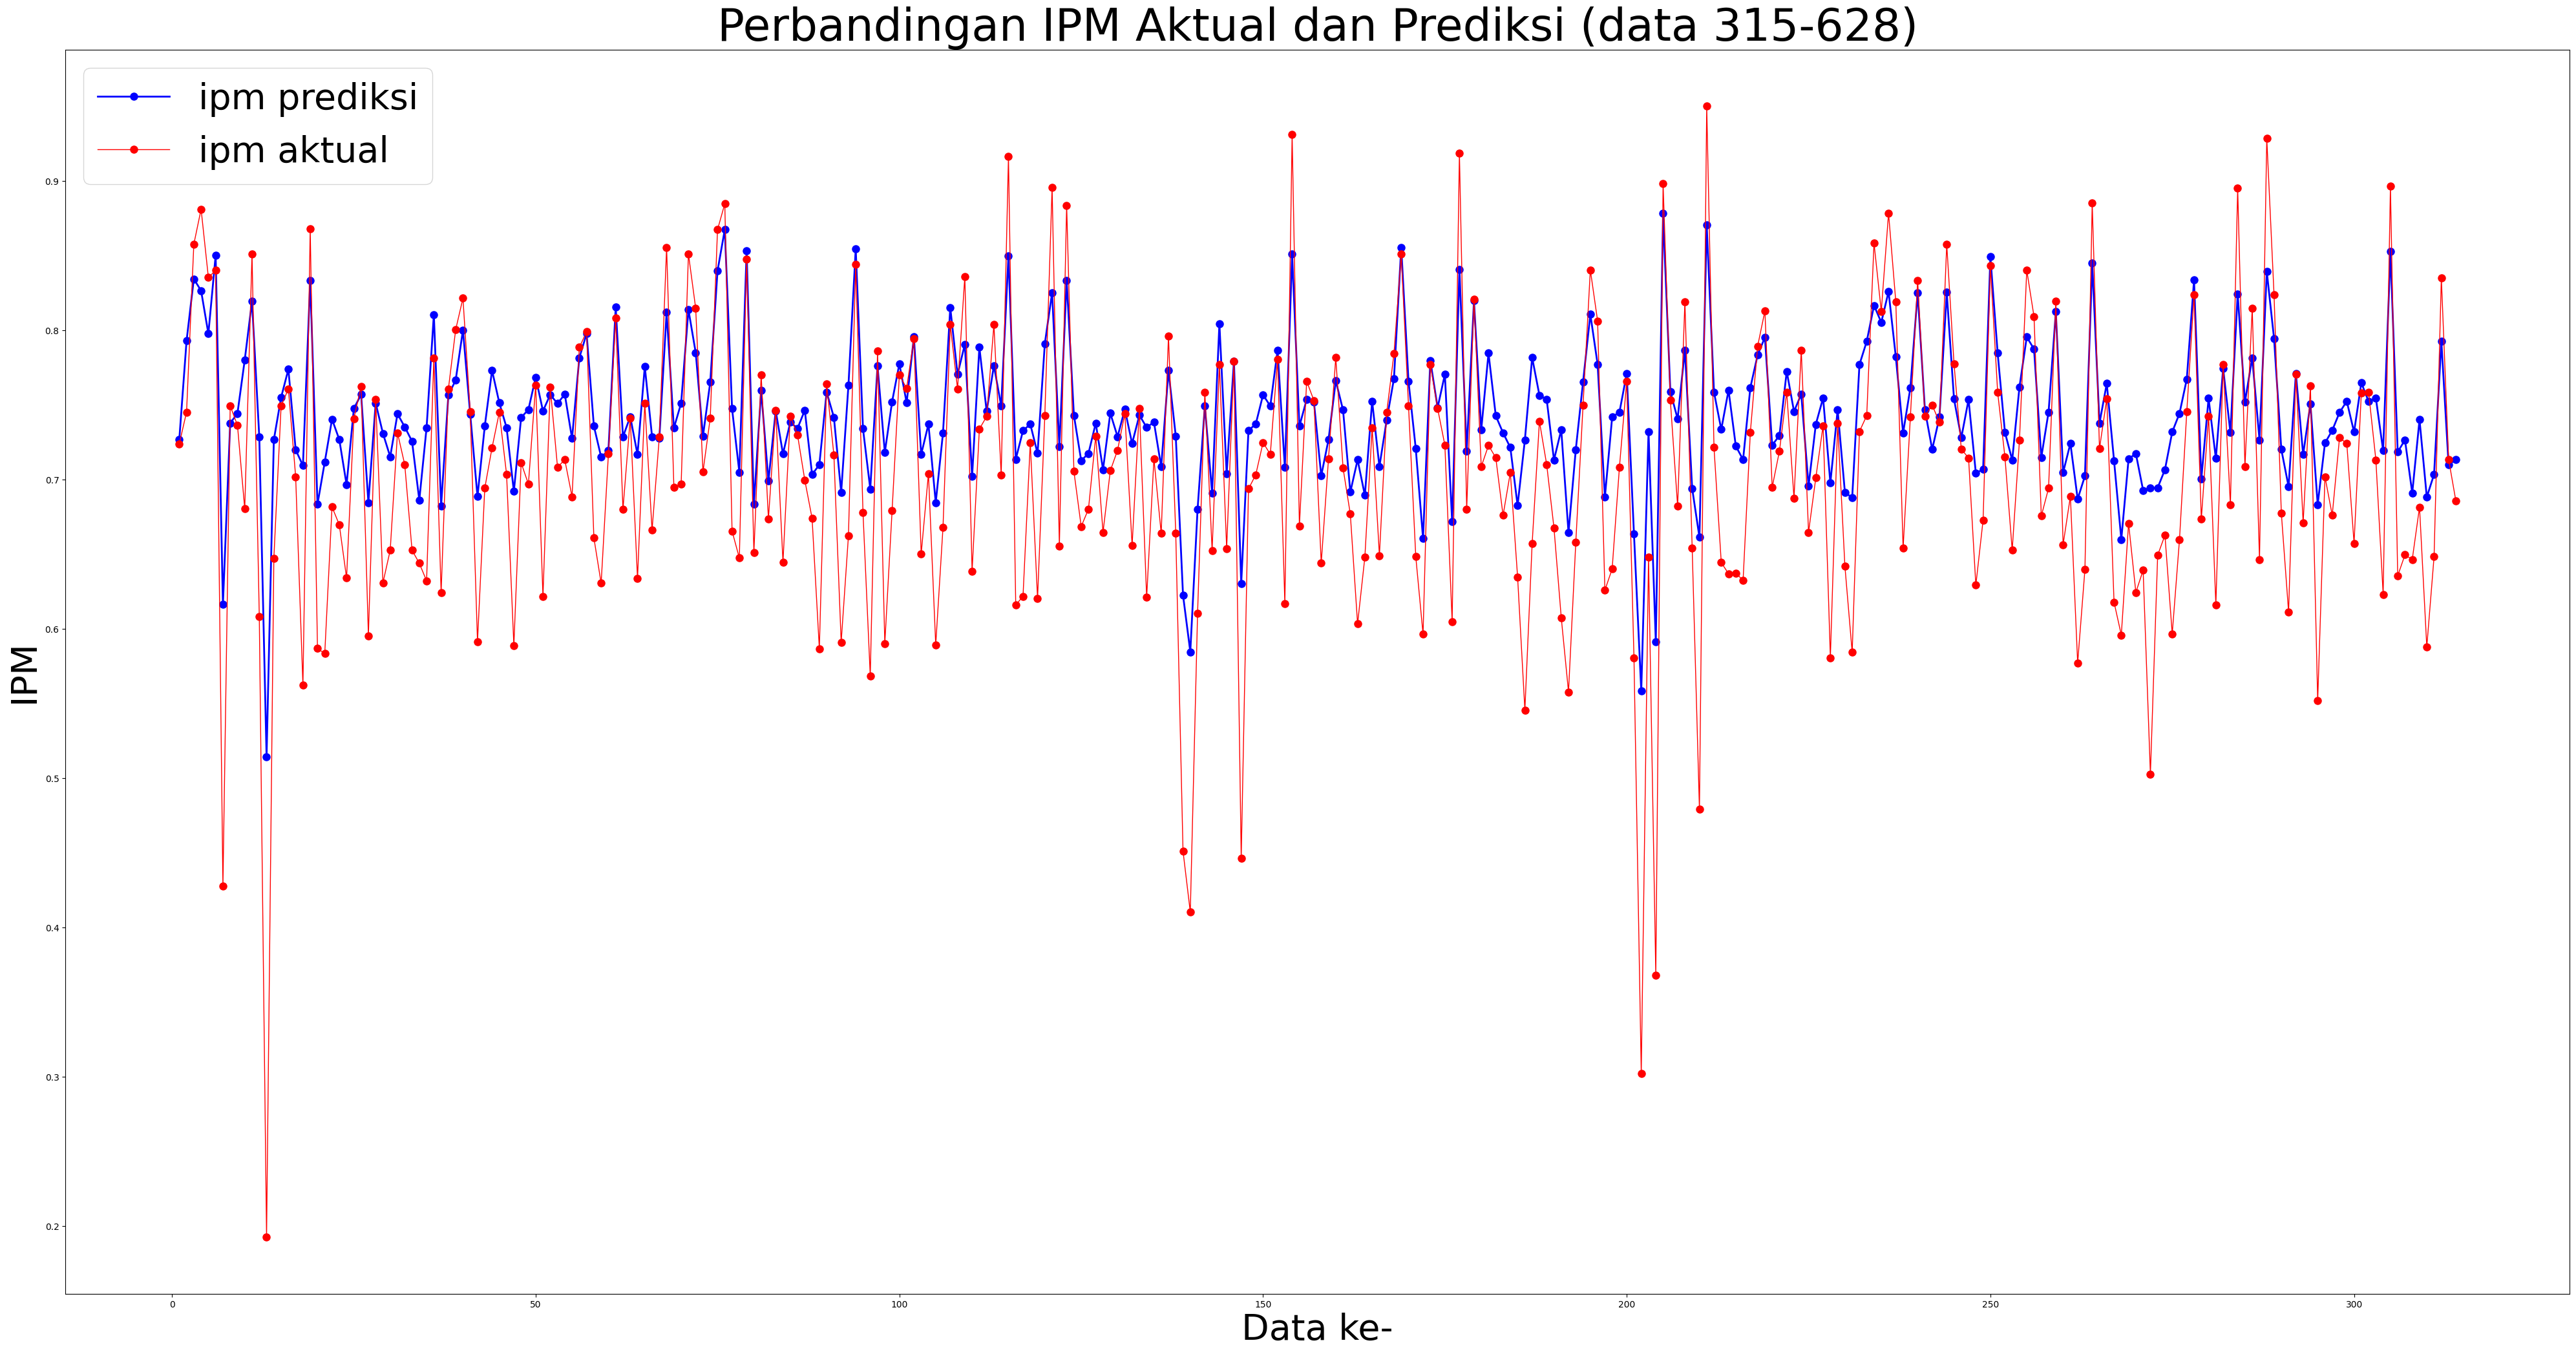

In [11]:
datake = list(range(1, int(len(y_test)/2) + 1))
plt.figure(figsize=(50, 25))
plt.plot(datake, prediksi[314:], label="ipm prediksi", color='blue', linewidth=2, marker='o', markersize=8)
plt.plot(datake, y_test[314:], label="ipm aktual", color='red', linewidth=1, marker='o', markersize=8)
plt.title('Perbandingan IPM Aktual dan Prediksi (data 315-628)', fontsize=50)
plt.xlabel('Data ke-', fontsize=40)
plt.ylabel('IPM', fontsize=40)
plt.legend(fontsize=40)
plt.show()

##### Visualisasi Error

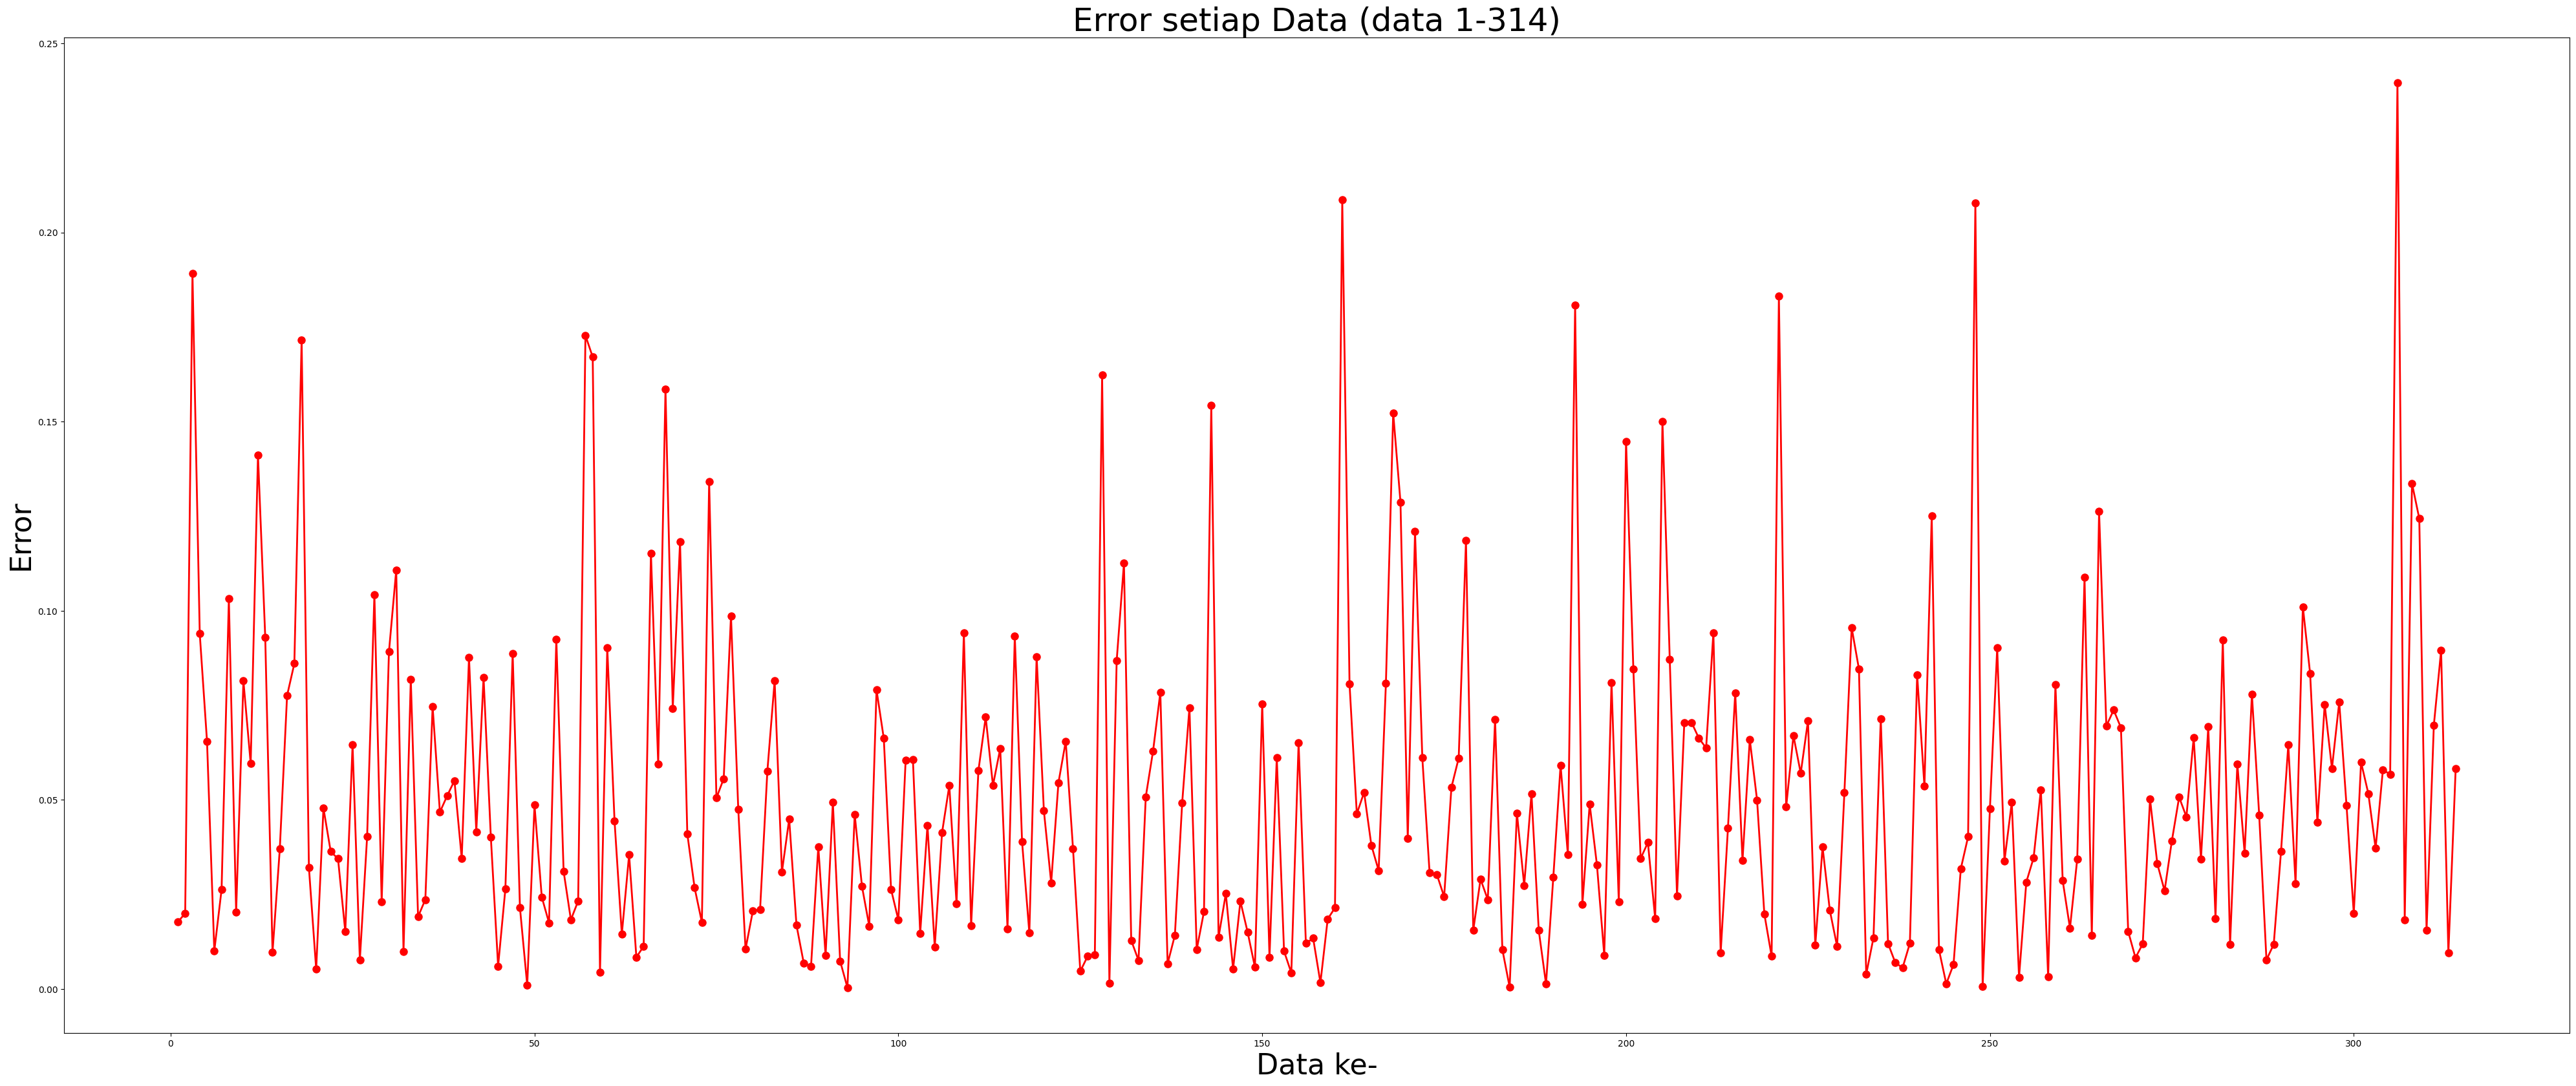

In [12]:
datake = list(range(1, int(len(y_test)/2) + 1))
plt.figure(figsize=(50, 20))
plt.plot(datake, error[:314], label="ipm prediksi", color='red', linewidth=2, marker='o', markersize=8)
plt.title('Error setiap Data (data 1-314)', fontsize=36)
plt.xlabel('Data ke-', fontsize=32)
plt.ylabel('Error', fontsize=32)
plt.show()

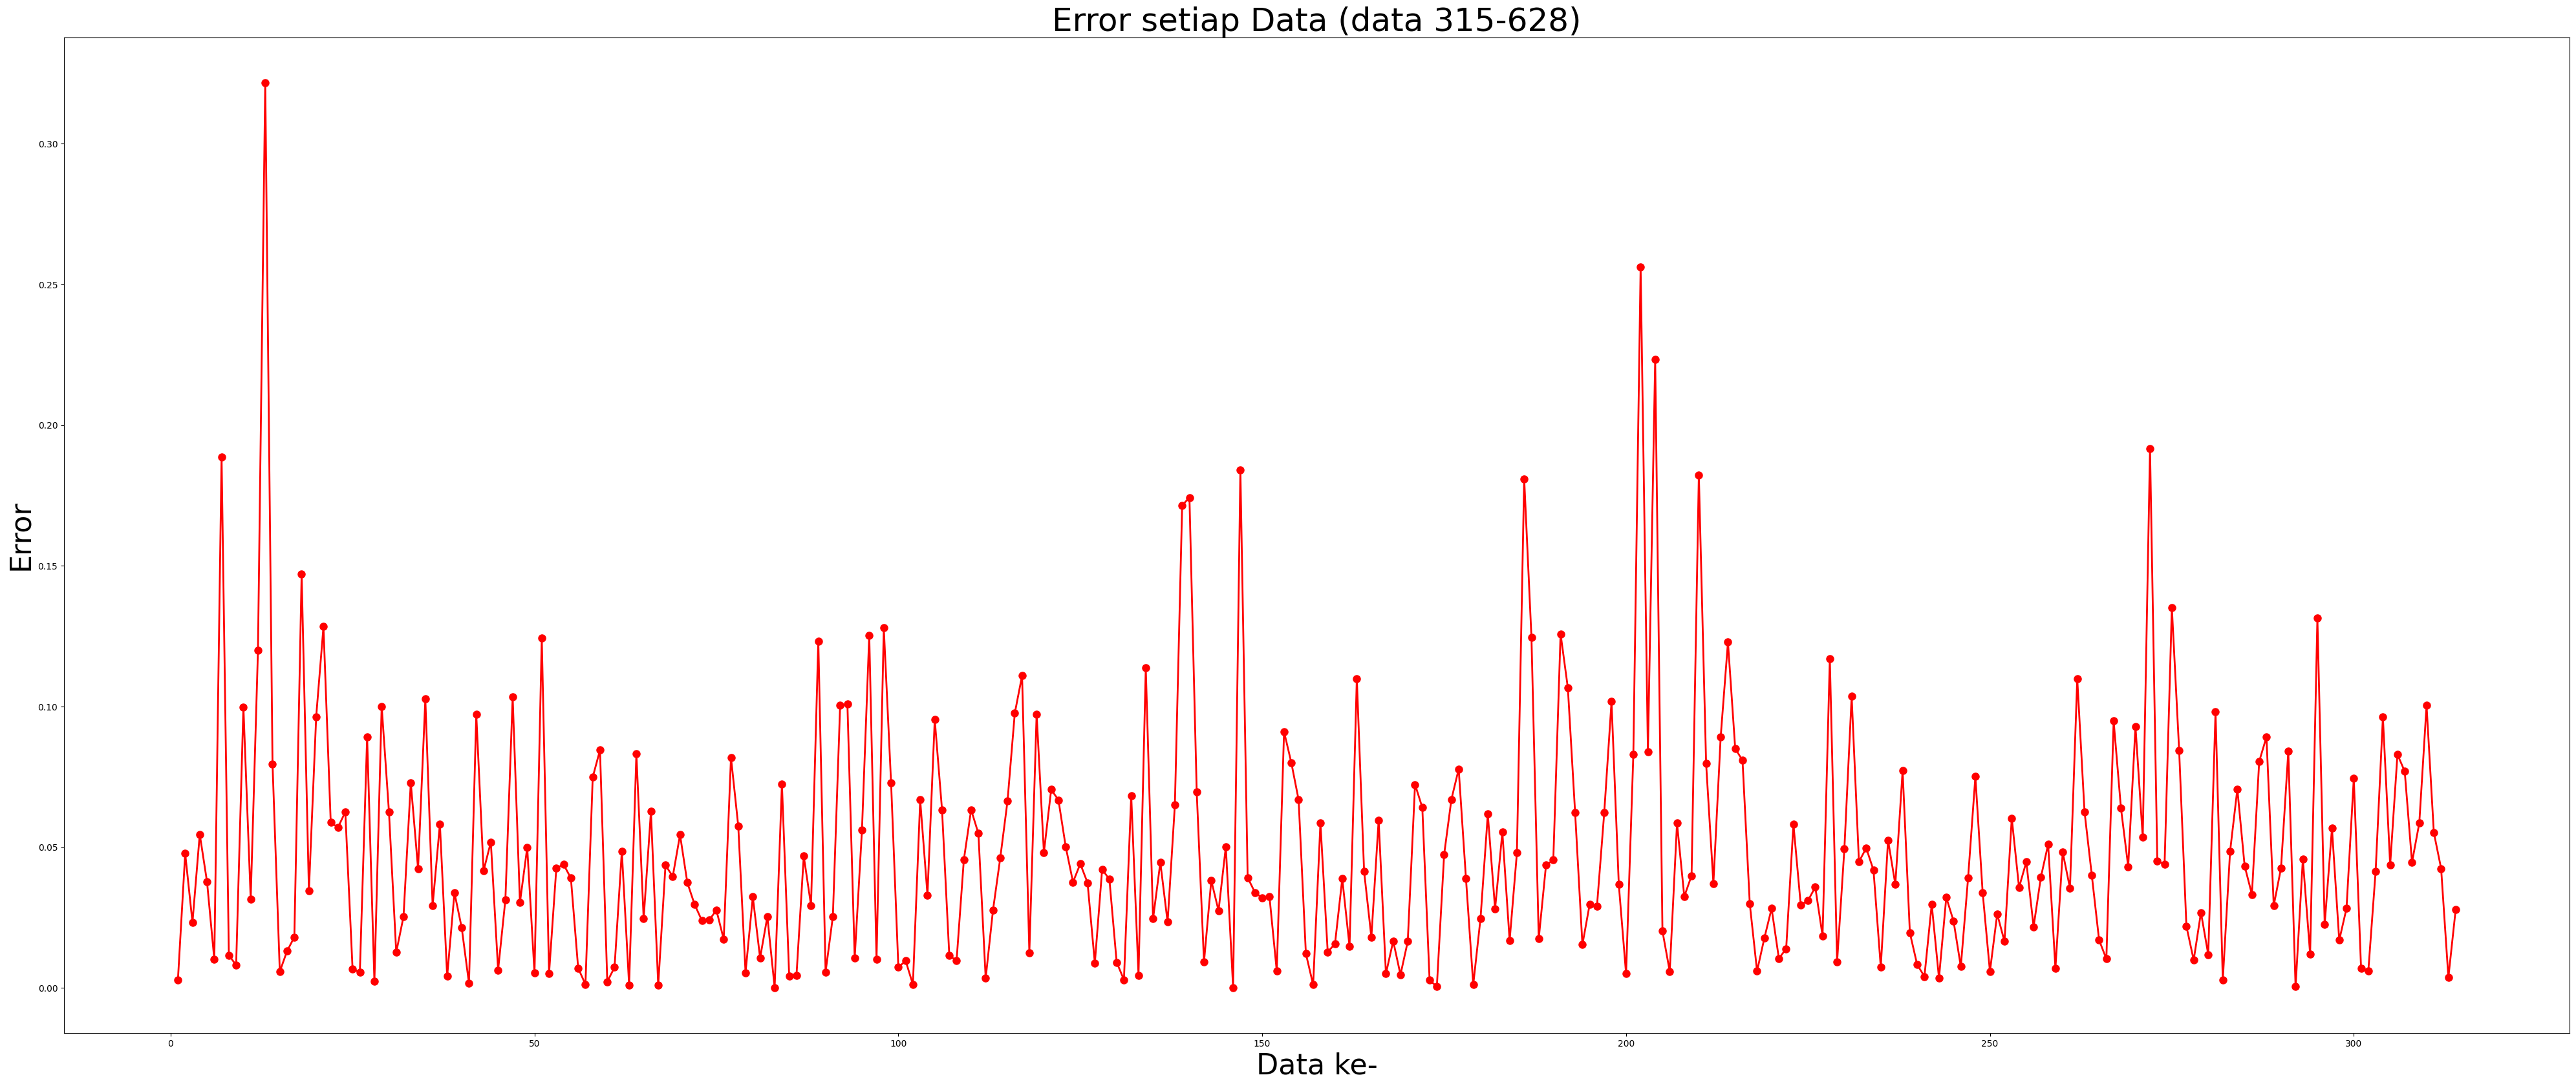

In [13]:
datake = list(range(1, int(len(y_test)/2) + 1))
plt.figure(figsize=(50, 20))
plt.plot(datake, error[314:], label="ipm prediksi", color='red', linewidth=2, marker='o', markersize=8)
plt.title('Error setiap Data (data 315-628)', fontsize=36)
plt.xlabel('Data ke-', fontsize=32)
plt.ylabel('Error', fontsize=32)
plt.show()

In [14]:
max_error = max(error)
min_error = min(error)
rerata_error = sum(error) / len(error)
print(f"Maksimal Error: {max_error}")
print(f"Minimal Error: {min_error}")
print(f"Rerata Error: {rerata_error}")

Maksimal Error: 0.3217725792825543
Minimal Error: 9.945978535430555e-05
Rerata Error: 0.05012377845216177


In [15]:
for i in range(len(y_test)):
    print(f"Aktual: {y_test[i][0]} - Prediksi: {prediksi[i]}")

Aktual: 0.8115351004951937 - Prediksi: 0.7938019717986498
Aktual: 0.7084182930381591 - Prediksi: 0.7284180960619686
Aktual: 0.4280512671133119 - Prediksi: 0.6172318022536623
Aktual: 0.546315176230702 - Prediksi: 0.6402476604569696
Aktual: 0.670404893678998 - Prediksi: 0.7358226887181841
Aktual: 0.8323623652781823 - Prediksi: 0.8222827520539121
Aktual: 0.6996795805418001 - Prediksi: 0.7259691719685526
Aktual: 0.6318089134867463 - Prediksi: 0.7349382190629802
Aktual: 0.6894844159627147 - Prediksi: 0.7098465036587831
Aktual: 0.6307893970288377 - Prediksi: 0.7122458938975684
Aktual: 0.9094086804544133 - Prediksi: 0.8498592670898346
Aktual: 0.5525779201864259 - Prediksi: 0.693741547725051
Aktual: 0.5266530731138945 - Prediksi: 0.6196286787996441
Aktual: 0.7746868628022138 - Prediksi: 0.7649923953443822
Aktual: 0.6893387707544422 - Prediksi: 0.72634995238397
Aktual: 0.5576755024759685 - Prediksi: 0.6352461642159976
Aktual: 0.6479755316050102 - Prediksi: 0.734008463148829
Aktual: 0.4876201572